## Polar Axis

For a demonstration of a line plot on a polar axis, see @fig-polar.

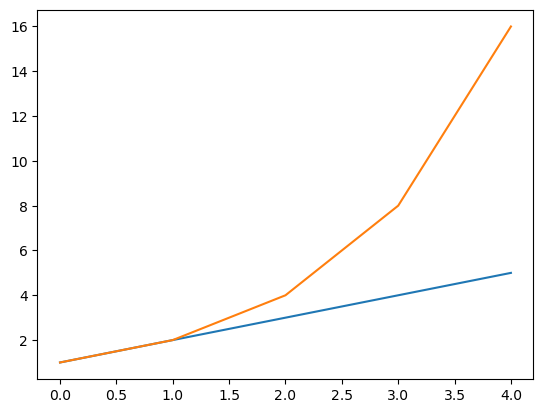

In [5]:
#| label: fig-polar
#| fig-cap: "A line plot on a polar axis"

import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("test.txt", delimiter=",")
plt.plot(data)